* 摘要：

目前最先进的关系分类方法主要是基于统计的ma-chine学习，其性能很大程度上取决于提取特征的质量。所提取的特征往往来自于已有的自然语言处理(NLP)系统的输出，这导致了现有工具中错误的传播，阻碍了这些系统的性能。本文利用卷积深度神经网络(DNN)提取词汇和句子的层次特征。我们的方法将所有的单词标记作为输入，而不需要复杂的预处理。
首先，通过查找单词embeddings1将单词标记转换为向量。然后，根据给定的名词提取词汇级特征。同时，使用卷积方法学习句子级特征。将这两个层次的特征串联起来，形成最终提取的特征向量。最后，将这些特征输入到一个软最大分类器中来预测两个标记名词之间的关系。实验结果表明，我们的方法明显优于最先进的方法。


* 知识点：

1.目前关系分类主要基于统计的ma-chine学习。

2.本文利用卷积神经网络提取词汇和句子特征。

* 不理解的内容：

1.ma-chine学习是什么？

2.根据给定的名词提取词汇级特征，指的是什么？

3.根据给定的名词提取词汇级特征？


* 1.介绍

关系分类的任务是预测名词对之间的语义关系，可以定义为:给定一个句子，其名词对为e1和e2，我们的目标是识别出e1和e2之间的关系(Hendrickx et al.， 2010)。在各种NLP应用中，自动关系分类作为一个目的和一个中间步骤，受到了广泛的关注。

最具代表性的关系分类方法是监督范式;这些方法已被证明是有效的，并产生了相对较高的性能(Zelenko et al.， 2003;布内斯库和穆尼，2005;周等，2005;Mintz等人，2009)。监督方法进一步分为基于特征的方法和基于内核的方法。基于特征的方法使用在执行文本分析后选择的一组特征。它们将这些特性转换为符号id，然后使用类似于词袋模型2的范式将其转换为向量。相反，基于内核的方法需要以解析树(例如依赖关系解析树)的形式预处理输入数据。这些方法是有效的，因为它们利用了大量的语言知识。然而，提取的特征或精心设计的内核往往来自于已有NLP系统的输出，这导致了现有工具中错误的传播，并阻碍了这些系统的性能(Bach和Badaskar, 2007)。考虑从现有的NLP工具中提取尽可能独立的特性是很有吸引力的。

为了确定名词对之间的关系，需要从句子中不同的句法和语义结构中巧妙地结合词汇和句子层次的线索。例如，在句子“the [fire]e1 inside WTC was caused by [fuel]e2”中，为了确定火与燃料之间是一种因果关系，我们通常利用标记的名词和整个句子的意义。在本文中，我们利用卷积神经网络来提取词汇和句子级特征来进行关系分类。我们的方法将所有的单词标记作为输入，而不需要复杂的预处理，例如词性标记和语法解析。首先，通过查找单词嵌入，将所有单词标记转换为向量。然后，根据给定的名词提取词汇级特征。同时，使用卷积方法学习句子级特征。将这两个层次的特征串联起来，形成最终提取的特征向量。最后，将这些特征输入到一个softmax分类器中，以预测两个标记名词之间的关系。

colo -lobert等人(2011)曾在词性标注、分块(CHUNK)、命名实体识别(NER)和语义角色标记(SRL)的背景下探索过使用卷积DNN提取NLP特征的想法。我们的工作与Collobert等人(2011)有着相似的直觉。在(Collobert et al.， 2011)中，所有的任务都被认为是顺序标记的问题-lems，其中输入句子中的每个单词都被赋予一个标签。然而，我们的任务“关系分类”可以看作是一个多类分类问题，导致了不同的目标函数。此外，关系分类被定义为为成对的单词分配关系标签。因此，有必要指定希望为哪些对单词分配关系标签。为此，位置特征(PF)被用来编码到目标名词对的相对距离。据我们所知，这是第一个使用卷积DNN进行关系分类的例子。

* 知识点：

1.关系分类，可以看成一个多分类问题。

2.系分类被定义为为成对的单词分配关系标签。

3.位置特征(PF)被用来编码到目标名词对的相对距离。

* 不理解的内容：

1.我们的方法将所有的单词标记作为输入，而不需要复杂的预处理，例如词性标记和语法解析。不知道之前词性标记和句法分析之后怎么做关系提取？


本文的贡献可以总结如下。

• 我们探索在不需要复杂的NLP预处理的情况下进行关系分类的可行性。卷积神经网络用于提取词汇和句子级特征。

• 为了指定应该分配关系标签的单词对，建议使用位置特征对卷积DNN中到目标名词对的相对距离进行编码。

• 我们使用SemEval-2010 Task 8数据集进行实验。实验结果表明，所提出的位置特征是关系分类的关键。提取的词汇和句子层次特征对关系分类是有效的。我们的方法优于最先进的方法。

* 知识点：

1.使用位置特征是关系分类的关键。

2.提取词汇和句子特征对关系分类是有效的。

* 2.相关工作

关系分类是自然语言处理中的一个重要课题。关系分类的研究方法很多，包括无监督关系发现和监督分类。研究人员提出了不同的特征，以确定之间的关系使用不同的方法

在无监督范式中，使用上下文特性。分布假设理论(Harris, 1954)指出，出现在相同语境中的单词往往具有相似的含义。因此，假定出现在相似上下文中的名词对具有相似的关系。Hasegawa等(2004)采用分层聚类的方法对名词性语境进行聚类，简单地选择语境中出现频率最高的词来表示名词性之间的关系。Chen等(2005)提出了一种基于模型订单选择和判别标签识别的无监督方法来解决这一问题。

在监督范式中，关系分类被认为是一个多分类问题，研究人员集中于提取更复杂的特征。通常，这些方法可以分为两种类型:基于特征的方法和基于内核的方法。在基于特征的方法中，利用不同的策略将分类线索(如序列和解析树)转换为特征向量(Kambhatla, 2004;Suchanek等人，2006)。在将结构化表示转换为特征向量时，基于特征的方法存在选择合适特征集的问题。基于内核的方法提供了一种自然的替代方法来利用输入分类线索的丰富表示，比如语法解析树。基于内核的方法允许使用大量特性，而无需显式地提取特性。各种核，如卷积树核(钱顶叶)。为了解决关系分类问题，分别提出了子序列核(Mooney and Bunescu, 2005)和依赖树核(Bunescu and Mooney, 2005)。然而，上述方法缺乏足够的标记数据进行训练。Mintz等人(2009)提出了远程监控(DS)来解决这一问题。DS方法选择知识库中与事实匹配的句子作为正例。DS算法有时会遇到标签错误的问题，导致有噪声的标签数据。为了解决DS的缺点，Riedel et al.(2010)和Hoffmann et al.(2011)将放松的DS假设转换为多实例学习。此外，Taka-matsu等(2012)指出放松的DS假设会失败，并提出了一种新的生成模型来对启发式标注过程建模，以减少错误的标签。

实验证明，该监督方法对关联检测是有效的，并能获得相对较高的性能。然而，该方法的性能在很大程度上取决于所设计特征的质量。近年来，随着人们对神经网络兴趣的恢复，许多研究者将注意力集中在深度学习特征的学习上。在NLP中，这类方法主要基于学习每个单词的分布式表示，也称为单词嵌入(Turian et al.， 2010)。Socher等(2012)提出了一种用于关系分类的递归神经网络(RNN)，该神经网络通过学习连接两个名词的句法树路径中的向量来确定它们之间的语义关系。桥本等(2013)也使用RNN进行关系分类;他们的方法允许对目标任务的重要短语进行显式加权。正如在第1节中提到的，使用现有的NLP工具很难设计高质量的特性。本文提出了一种卷积神经网络，用于提取词汇和句子级特征进行关系分类;我们的方法有效地缓解了传统特征的缺点。

* 知识点：

1.聚类方法理论：分布假设理论(Harris, 1954)指出，出现在相同语境中的单词往往具有相似的含义。因此，假定出现在相似上下文中的名词对具有相似的关系。

2.监督方法：关系分类被认为是一个多分类问题。

3.监督方法对关联关系是有效的，可以获得相对高的性能。

4.本文提出了一种卷积神经网络，用于提取词汇和句子级特征进行关系分类


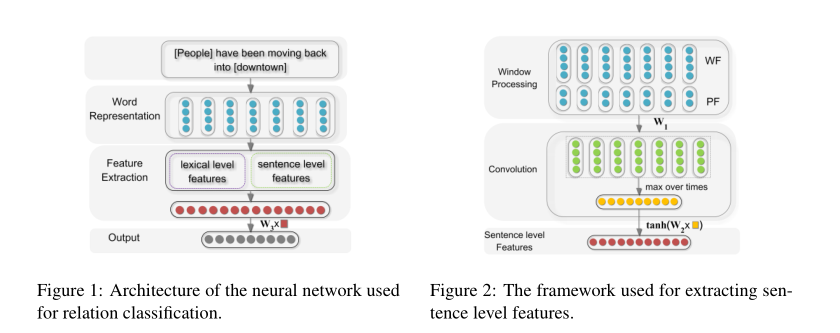

* 3.方法

* 3.1神经网络体系结构

图1描述了用于关系分类的神经网络的体系结构。网络接受一个输入语句，并发现多个层次的特征提取，其中更高层次表示输入的更抽象方面。它主要包括以下三个部分:单词表示、特征提取和输出。该系统不需要任何复杂的句法或语义预处理，系统的输入是一个带有两个标记名词的句子。然后，通过查找单词嵌入将单词标记转换为向量。然后分别提取词汇级特征和句子级特征，并直接串联起来形成最终的特征向量。最后，为了计算每个关系的置信度，将特征向量输入软最大分类器。分类器的输出是一个向量，其维数等于预定义关系类型的个数。各维度的值为对应关系的置信度得分。

* 知识点：

1.分别提取词汇级特征和句子级特征，并直接串联起来形成最终的特征向量。

2.分类器的输出是一个向量，其维数等于预定义关系类型的个数。


* 3.2词表示

在单词表示组件中，每个输入单词标记通过查找被转换为一个向量字嵌入。Collobert et al.(2011)报道，单词嵌入从有效的中学习未标记的数据量比随机初始化的嵌入要令人满意得多。关系分类时，我们首先要集中精力学习判别词的嵌入，它携带的信息量更大。不幸的是,要训练嵌入式这个词需要很长时间。然而，有许多训练有素的词嵌入其中都是免费的(Turian et al.， 2010)。此外，还对可用的词embeddings进行了比较本文的研究范围。我们的实验直接利用了Turian etal提供的经过训练的嵌入。(2010)。

* 知识点：

1.单词嵌入从有效的中学习未标记的数据量比随机初始化的嵌入要令人满意得多。

2.可以自训练，也可以用别人提供的词向量。

* 3.3.词汇水平特征

词汇级特征是决定关系的重要线索。传统的词法层次特征主要包括名词本身、名词对的类型和它们之间的单词序列实体的质量在很大程度上取决于现有NLP工具的结果。另外,本文使用一般词嵌入作为基本特征的来源。我们选择embeddings这个单词用于标记名词和上下文标记。此外，采用WordNet hypernyms 4作为MVRNN(Socher等，2012)。所有这些特征都被连接到我们的词法级特征向量l表中1给出与句子中标记的名词相关的所选单词嵌入。

* 知识点：

1.选择embeddings这个单词用于标记名词和上下文标记。


* 3.4句子层次特征

如第3.2节所述，所有标记都表示为单词向量，它们都是证与人类对单词相似性的判断相关联。尽管他们成功了，但只有一个词向量模型由于不能捕捉到远距离特征和语义特征而受到严重的限制位置性，自然语言的重要特性，它使人类能够理解意义一个更长的表达式。在本节中，我们提出一个最大集合卷积神经网络句级表示，并自动提取句级特征。图2显示了架构进行句子级特征提取。在窗口处理组件中，每个令牌更进一步表示为单词特(WF)和位置特征(PF)(见3.4.1和3.4.2节)。然后,向量经过一个卷积分量。最后，通过非线性变换。

* 知识点：

1.只有一个词向量模型由于不能捕捉到远距离特征和语义特征而受到严重的限制位置性。

2.提出一个最大集合卷积神经网络句级表示，并自动提取句级特征。


* 3.4.1词特征

分布假设理论(Harris, 1954)指出，出现在同一语境中的单词往往具有相同的倾向有相似的意思。为了捕捉这个特性，WF结合了单词的向量表示以及单词在上下文中的向量表示。假设我们有以下序列的单词。S:[人们]一直在搬回市区，每个单词还与单词embeddings的索引相关联。所有单词的符号，然后将句子S表示为向量列表(x 0,x 1，···，x 6)，其中x i对应于第i个单词在句子中的嵌入。为了使用w的上下文大小，我们组合了w窗口的大小将向量转化为更丰富的特征。例如，当我们取w = 3时，第三个单词“moving”的WF在句子中，S表示为[x2, x3, x4]。同样，考虑到整个句子，WF可以是表示如下:

* 知识点：



* 3.4.2位置特征

关系分类是一项非常复杂的工作。传统上，结构特征来解决这个问题(Bunescu and Mooney, 2005)。很显然,仅通过WF是不可能捕获这种结构信息的。有必要指定哪一个输入标记是句子中的目标名词。为此，对关系类提出了PF对。在本文中，PF是当前单词到w1和的相对距离的组合w2。例如，句子S中“moving”到“people”和“downtown”的相对距离为3分别和3。在我们的方法中，相对距离也映射到维数为d e (a)的向量hyperparameter);这个向量是随机初始化的。然后，我们得到距离向量d1和d2表示当前单词到w1和w2的相对距离，PF = [d1, d2]。结合WF而PF，这个词表示为[WF,PF] T，它随后被输入卷积分量的算法。


* 知识点：

1.仅通过WF是不可能捕获这种结构信息的。有必要指定哪一个输入标记是句子中的目标名词




* 3.4.3卷积

我们将看到，单词表示方法可以通过组合-捕获上下文信息向量在窗口中的位置。然而，它只围绕句子的每个单词产生局部特征。在关系分类中，用目标名词标记的输入句只对应一个翻译类型而不是预测每个单词的标签。因此，可能有必要利用所有的局部特征并预测全局关系。当使用神经网络时，卷积方法是一种自然的方法来合并所有的特征。与Collobert et al.(2011)类似，我们首先处理输出利用线性变换进行窗口处理。
窗口处理任务的输出，其中n 0 = w×n, n(超参数)为特征向量的维数，t为输入语句的令牌数。W 1∈R n 1×n 0，其中n 1 (a超参数)为隐层大小1，为线性变换矩阵。我们可以看到特性在任何时候都共享相同的权重，这大大减少了自由参数的数量学习。应用线性变换后，输出Z∈R n 1×t依赖于t在特征向量的每个维数中最有用的特征，我们对其进行极大值运算时间在Z。m i = maxZ(i，·)0≤i≤n 1 (2)其中Z(i，·)表示矩阵Z的第i行，最后得到特征向量m ={m 1,m 2，···，m n 1}，其维数不再与句子长度相关。

* 3.4.4句级特征向量

为了学习更复杂的特征，我们设计了一个非线性层，并选择双曲tanh作为激活功能。tanh的一个有用性质是它的导数可以用函数值本身表示。它的优点是在反向传播训练过程中易于计算梯度。形式上，非线性变换可以写成g=tanh(w2m).



* 3.5输出

将上述自动学习的词汇和句子级特征连接到a中单个向量f = [l,g]。为了计算每个关系的置信度，特征向量f∈R n 3×1 (n 3)将= n 2加上词法级特征的维数)输入到softmax分类器中。o = w3f (5)W 3∈R n 4×n 3是变换矩阵，o∈R n 4×1是网络的最终输出，其中n 4为关系分类系统可能的关系类型的数目。每个输出都可以则解释为对应关系的置信度得分。这个分数可以解释作为条件概率，应用softmax操作(参见第3.6节)。

* 5.实验

在本节中，我们进行了三组实验。第一个是通过交叉测试几个变种验证，以了解超参数的选择如何影响性能。在第二组实验中，我们比较了卷积-的性能传统的DNN学习特征和各种传统特征。第三组实验的目标是评估每个提取特征的有效性。

* 6.反向传播训练

DNN基于关系分类方法可以表示为一个五倍的θ=(X,N, w1, w2, w3) 6。在本文中，每个输入语句都是独立考虑的。给定一个,把例子年代,网络参数θ输出向量o, o我包含其中的第i个组件我关系。得到的分数条件概率p(我| x,θ),我们应用softmax操作结束所有关系类型.

* 6.结论

本文利用卷积深度神经网络(DNN)提取词汇和句子关系分类的层次特征。在网络中，成功地提出了位置特征指定希望为其分配关系标签的名称对。系统得到添加PF后，性能有明显改善。自动学习的特性产生了很好的效果并且可以替代基于现有NLP工具输出的精心设计的特性。

致谢

本课题由国家基础研究计划(No. 2014CB340503)资助

国家自然科学基金(编号:61272332、61333018、61202329、61303180)。

这项工作得到华为技术有限公司诺亚方舟实验室的部分支持。我们感谢匿名者评审员的深刻见解。